### Rank based methods

Consider a case where you hypothesized that your lizard would grow over time, but you had no idea if that growth 
would go up at a constant rate (linear) or whether it would slow down over time (perhaps logarithmically) or if lizards might have growth spurts at various points.

In such a case, we might want a method that could account for any of these possibilities: we just suppose that the lizards keep getting bigger, and never get smaller, but beyond that we don't have any special feelings about whether the increase is linear, logarithmic, or goes up in fits and spurts.

In such a case we might choose to use a __rank based__ method. Instead of predicting the exact length of a lizard based on it's age, we would instead merely assert that the youngest lizard is smallest, the oldest lizard is largest, and the ones in the middle sort out according to age. In that case we could replace the y value for the smallest lizard with a 1, the y value for the second largest lizard with a 2, etc. These would then be the *ranks*  of the lizards lengths.

If we were doing a normal linear regression of length on age, we would be doing Pearson regression. If we instead regress the *rank* of age on the *rank* of length then we are performing Spearman regression.

It turns out that by transforming interval or ratio values into __ranks__ we can produce a range of new methods that make fewer assumptions about our distribution.

For each common *parameteric* statistical test from statistics there is likely an equivalent non-parametric or rank-based alternative.

| Parametric Test  | Non-parametric Test          |
|------------------|------------------------------|
|Pearson regression|Spearman regression           |
|T-test            |Mann-Whitney U                |
|Paired T-test     |Mann-Whitney Signed Rank test |
|ANOVA             |Kruskall-Wallace              |



Let's consider an example in which each x step increases y exponentially.

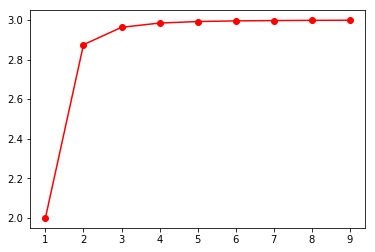

In [3]:
%matplotlib inline
from matplotlib.pyplot import plot
from random import randint
from math import log

def simulate_y(x):
    return (3 - 1/x**3)

xs = list(range(1,10))
ys = []        
for x in xs:
    ys.append(simulate_y(x))

#Plot the result
plot(xs,ys,'ro-')

In [91]:
#Now let's fit Pearson and Spearman regressions
from scipy.stats import spearmanr,pearsonr
spearman_rho,p = spearmanr(xs,ys)
print("Spearman r = ",spearman_rho)
print("Spearman p=",p)

pearson_r,p = pearsonr(xs,ys)
print("Pearson r = ",pearson_r)
print("Pearson p=",p)

Spearman r =  1.0
Spearman p= 0.0
Pearson r =  0.6191269478109577
Pearson p= 0.07542274289051659
